In [123]:
import pandas as pd
import numpy as np
import lyricsgenius as lg
from pprint import pprint
from unidecode import unidecode
from cleantext import clean
import nltk
nltk.download('stopwords')

from os import path
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator


[nltk_data] Downloading package stopwords to C:\Users\Allen
[nltk_data]     Gueco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [280]:
from nltk.corpus import stopwords

In [283]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [3]:
LG_TOKEN = "-JkwFzsm9krxAzNgJo2aKEzHw2RsHaJzcWElzwQHIa-xU9invgqXARxn182I5UQd"

In [4]:
genius = lg.Genius(LG_TOKEN, remove_section_headers=True, skip_non_songs=True)

In [5]:
artist = genius.search_artist("Taylor Swift")

Searching for songs by Taylor Swift...

Song 1: "​cardigan"
Song 2: "​exile"
Song 3: "Lover"
Song 4: "​the 1"
Song 5: "Look What You Made Me Do"
Song 6: "​august"
Song 7: "​betty"
Song 8: "End Game"
Song 9: "You Need To Calm Down"
Song 10: "ME!"
Song 11: "Blank Space"
Song 12: "​champagne problems"
Song 13: "...Ready for It?"
Song 14: "​my tears ricochet"
Song 15: "​willow"
Song 16: "​invisible string"
Song 17: "Cruel Summer"
Song 18: "​the last great american dynasty"
Song 19: "Delicate"
Song 20: "Call It What You Want"
Song 21: "​seven"
Song 22: "Style"
Song 23: "​illicit affairs"
Song 24: "Bad Blood (Remix)"
Song 25: "​this is me trying"
Song 26: "Love Story"
Song 27: "​evermore"
Song 28: "Gorgeous"
Song 29: "​happiness"
Song 30: "​peace"
Song 31: "​mirrorball"
Song 32: "​mad woman"
Song 33: "​tolerate it"
Song 34: "The Man"
Song 35: "Don’t Blame Me"
Song 36: "I Did Something Bad"
Song 37: "Dress"
Song 38: "​ivy"
Song 39: "​no body, no crime"
Song 40: "​gold rush"
Song 41: "​hoax"
S

In [309]:
def clean_lyrics(lyrics):
    lyrics = re.sub("\d*EmbedShare URLCopyEmbedCopy", "", lyrics)
    lyrics = re.sub("\(", "", lyrics)
    lyrics = re.sub("\)", "", lyrics)
    
    return clean(lyrics, 
                 no_punct=True,
                 replace_with_punct=" ",
                 no_line_breaks=True,
                 fix_unicode=True, 
                 lower=True)

In [310]:
b = clean_lyrics(artist.song('wildest dreams').lyrics)
b

Searching for "wildest dreams" by Taylor Swift...
Done.


'he said let s get out of this town drive out of the city away from the crowds i thought heaven can t help me now nothing lasts forever but this is gonna take me down he s so tall and handsome as hell he s so bad but he does it so well i can see the end as it begins my one condition is say you ll remember me standin in a nice dress starin at the sunset babe red lips and rosy cheeks say you ll see me again even if it s just in your wildest dreams ah ha wildest dreams ah ha i said no one has to know what we do his hands are in my hair his clothes are in my room and his voice is a familiar sound nothin lasts forever but this is gettin good now he s so tall and handsome as hell he s so bad but he does it so well and when we ve had our very last kiss my last request is say you ll remember me standin in a nice dress starin at the sunset babe red lips and rosy cheeks say you ll see me again even if it s just in your wildest dreams ah ha ha ha wildest dreams ah ha you ll see me in hindsight ta

In [47]:
def get_all_albums(artist_id):
    albums = []
    page = 1
    while page:
        res = genius.artist_albums(artist_id, page=page)
        albums.extend(res['albums'])
        page = res['next_page']
        
    return albums

In [204]:
albums = get_all_albums(artist.id)

Deluxe for all of them

Taylor Swift

Speak now

Fearless

Red

1989

Reputation

Lover

folklore

evermore

In [205]:
album_idx = {6, 10, 21, 25, 27, 28, 30, 36, 49}

In [206]:
selected_albums = [a for (idx, a) in enumerate(albums) if idx in album_idx]

In [207]:
def get_album_lyrics(album_id, artist):
    tracks_lyrics = []
    
    for track in genius.album_tracks(album_id)['tracks']:
        try:
            song = artist.song(track['song']['title'])
            lyrics = clean_lyrics(song.lyrics)
        except:
            continue
        tracks_lyrics.append(lyrics)
    
    return " ".join(tracks_lyrics)


In [208]:
for idx, a in enumerate(selected_albums):
    pprint(f"{idx} - {a['name']}: {a['id']}")

'0 - Fearless (Taylor’s Version): 734107'
'1 - evermore (deluxe version): 710147'
'2 - folklore (deluxe version): 659926'
'3 - Lover: 520929'
'4 - reputation: 350247'
'5 - 1989 (Deluxe): 621286'
'6 - Red (Deluxe Edition): 597875'
'7 - Speak Now (Deluxe): 597883'
'8 - Taylor Swift (Deluxe): 660089'


In [340]:
evermore = selected_albums[1]
folklore = selected_albums[2]
fearless = selected_albums[0]
red = selected_albums[6]
ninteen_eighty_nine = selected_albums[5]
lover = selected_albums[3]
speak_now = selected_albums[7]
reputation = selected_albums[4]
taylor_swift = selected_albums[8]

In [330]:
def generate_wordcloud_image(album, artist, path, 
                             background_color="black",
                             relative_scaling=0.5, 
                             collocations=True, 
                             collocation_threshold=30):
    
    album_lyrics = get_album_lyrics(album['id'], artist)
    album_mask = np.array(Image.open(path))
    
    album_wordcloud = WordCloud(
        mode="RGBA",
        mask=album_mask,
        max_words=10000,
        collocations=collocations,
        collocation_threshold=collocation_threshold,
        background_color=background_color,
        stopwords=stopwords.words('english'),
        relative_scaling=relative_scaling).generate(album_lyrics)
    image_colors = ImageColorGenerator(album_mask)
    
    plt.figure(figsize=(7, 7))
    plt.imshow(album_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    
    plt.savefig(f"{album['name']}_wc.png", format="png")

In [338]:
from collections import Counter
from nltk.corpus import stopwords

def get_stats(lyrics):
    pprint(Counter([w for w in lyrics.split() if w not in stopwords.words('english')]))

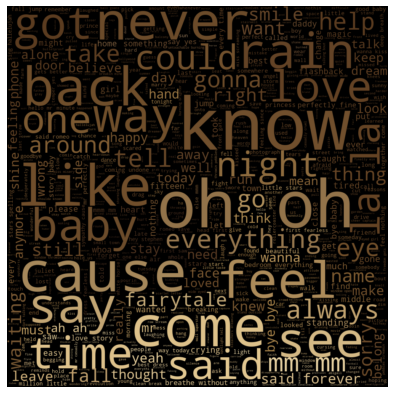

In [314]:
generate_wordcloud_image(fearless, artist, "album_art/fearless_taylors_version_album.jpg")

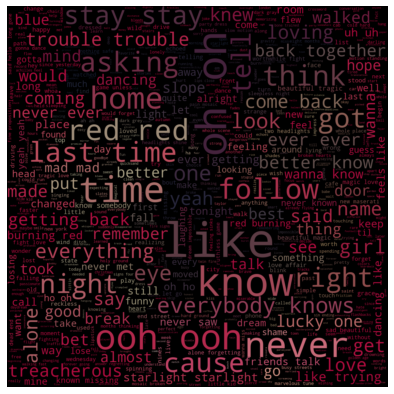

In [315]:
generate_wordcloud_image(red, artist, "album_art/red_album.jpg")

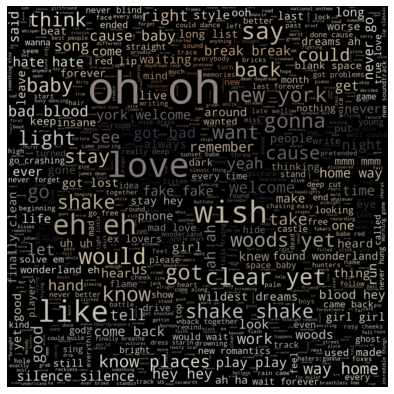

In [316]:
generate_wordcloud_image(ninteen_eighty_nine, artist, "album_art/1989_album.jpg")

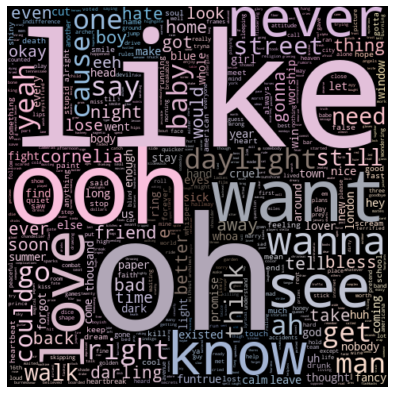

In [323]:
generate_wordcloud_image(lover, artist, "album_art/lover_album.jpg", relative_scaling=0.000001, collocations=False)

Searching for "Speak Now [Liner Notes]" by Taylor Swift...
Specified song does not contain lyrics. Rejecting.


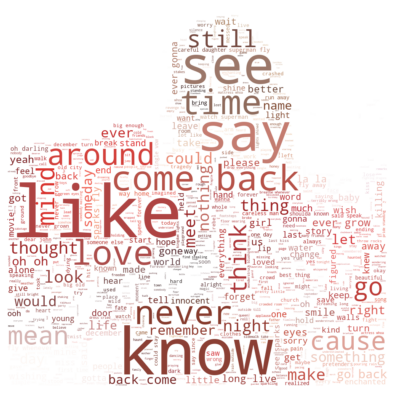

In [318]:
generate_wordcloud_image(speak_now, artist, "album_art/speak_now_album.jpg", background_color="white")

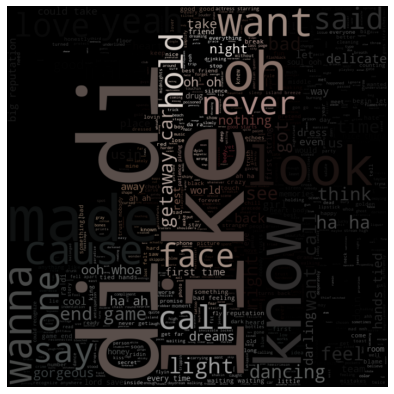

In [337]:
generate_wordcloud_image(reputation, artist, "album_art/reputation_album.jpg", relative_scaling=0.001, collocations=True)

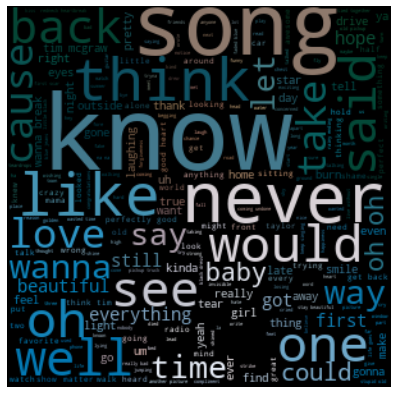

In [320]:
generate_wordcloud_image(taylor_swift, artist, "album_art/taylor_swift_album.jpg", relative_scaling=0.0001)

Searching for "Evermore [Liner Notes]" by Taylor Swift...
Specified song does not contain lyrics. Rejecting.


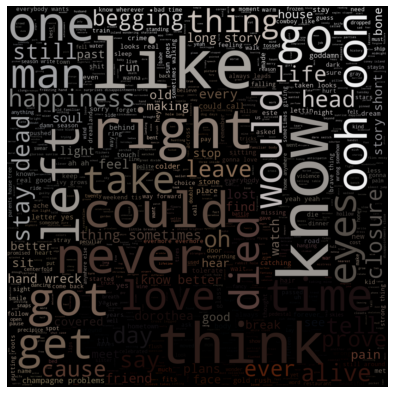

In [342]:
generate_wordcloud_image(evermore, artist, "album_art/evermore_album.jpg")

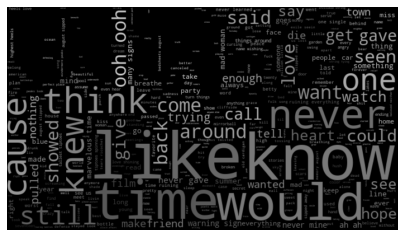

In [343]:
generate_wordcloud_image(folklore, artist, "album_art/folklore_album.jpg")

In [345]:
def taylor_lyrics(artist):
    total_lyrics = []
    for a in selected_albums:
        album_lyrics = get_album_lyrics(a['id'], artist)
        total_lyrics.append(album_lyrics)
        
    return " ".join(total_lyrics)

In [348]:
lyrics = taylor_lyrics(artist)

Searching for "Evermore [Liner Notes]" by Taylor Swift...
Specified song does not contain lyrics. Rejecting.
Searching for "Speak Now [Liner Notes]" by Taylor Swift...
Specified song does not contain lyrics. Rejecting.


In [349]:
len(lyrics.split())

67288

In [357]:
wordcloud = WordCloud(
    mode="RGBA",
    stopwords=stopwords.words('english'),
    width=2000,
    max_words=10000,
    height=2000).generate(lyrics)

plt.figure(figsize=(150, 150))
plt.imshow(wordcloud)
plt.axis("off")

plt.savefig(f"taylor_lyrics_wc.png", format="png")

In [352]:
get_stats(lyrics)

Counter({'oh': 746,
         'like': 531,
         'know': 491,
         'never': 377,
         'love': 321,
         'back': 277,
         'time': 273,
         'cause': 259,
         'ooh': 233,
         'one': 216,
         'say': 209,
         'think': 206,
         'see': 206,
         'got': 205,
         'baby': 201,
         'go': 192,
         'could': 185,
         'want': 183,
         'come': 176,
         'would': 172,
         'wanna': 163,
         'said': 163,
         'right': 159,
         'yeah': 156,
         'ever': 143,
         'ah': 140,
         'look': 136,
         'get': 128,
         'way': 125,
         'take': 124,
         'stay': 124,
         'tell': 121,
         'gonna': 118,
         'still': 118,
         'night': 115,
         'good': 113,
         'home': 110,
         'made': 103,
         'around': 102,
         'feel': 102,
         'everything': 97,
         'away': 94,
         'things': 93,
         'let': 93,
         'bad': 93,
         '